<a href="https://colab.research.google.com/github/westooon/PyDa_Diplom_work/blob/main/PyDa_Diplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Итоговый проект по курсу "Python для анализа данных"

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
plt.style.use('dark_background')

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой. \
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

## 1 Задание
Загрузите файл HR.csv в pandas dataframe

In [106]:
df = pd.read_csv('https://raw.githubusercontent.com/westooon/PyDa_Diplom_work/main/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2 Задание
Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

Расчет среднего, медианы, мин, макс, сред.отклонения для количественных переменых.

In [107]:
base_stat = df.describe().loc[['mean', 'min', 'max', 'std']].round(3)
base_stat.loc['median'] = df[base_stat.columns].median()
base_stat

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
median,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000


Мода для качественных признаков

In [108]:
mode_ = df[['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']].mode()
mode_

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


## 3 Задание
Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные

In [109]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

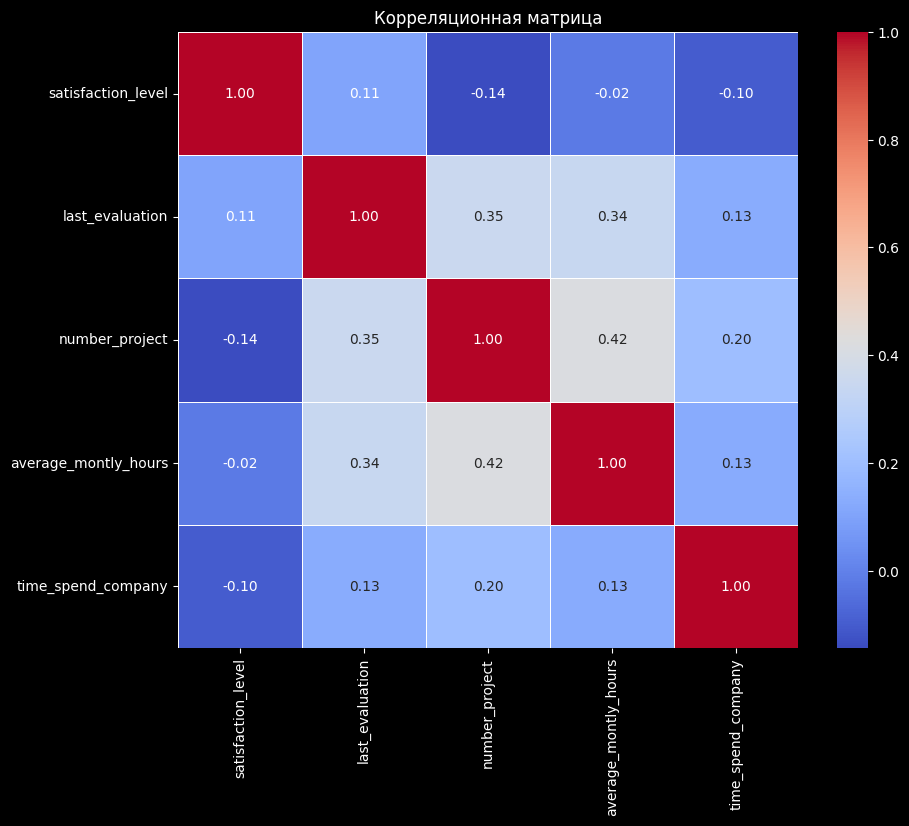

In [110]:
num_col = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'] #количественные переменные
corr_matrix = df[num_col].corr()

# Визуализирую корреляционную матрицу с помощью heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

Две самые скоррелированные переменные:

1. `Среднее количество часов работы в месяц` и `количество проектов`  0.42
2. `Время с момента последней оценки в годах` и `количество проектов` 0.35

Две наименее скоррелированные переменные


1. `Среднее количество часов работы в месяц` и `уровень удовлетворенности` -0.02
2. `Уровень удовлетворенности` и `стаж работы в компании` -0.10




## 4 Задание


In [151]:
dep = df.groupby('department').size().reset_index()
dep.rename(columns={0:'count'})

,department,count
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720
